In [15]:
# -----------------------------------
# 1. IMPORT LIBRARIES
# -----------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [16]:
# -----------------------------------
# 2. LOAD THE DATASET
# -----------------------------------

file_path = "C:/Users/Vivek/Downloads/NVDA.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
data = data[['Adj Close']].dropna()


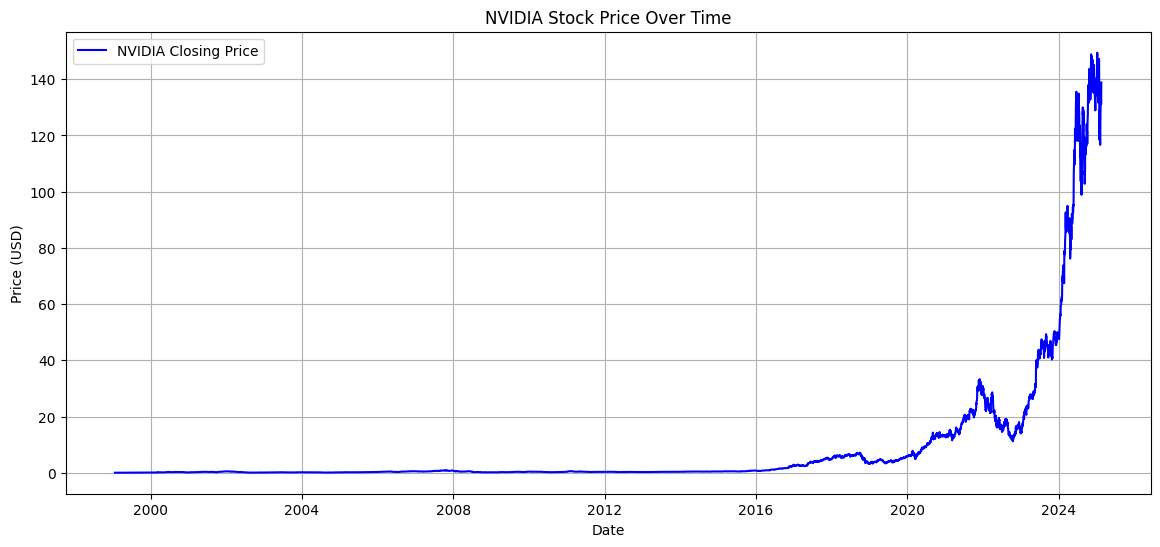

In [17]:
# -----------------------------------
# 3. VISUALIZE THE PRICES
# -----------------------------------
plt.figure(figsize=(14, 6))
plt.plot(data, label="NVIDIA Closing Price", color='blue')
plt.title("NVIDIA Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show() 

In [18]:
# -----------------------------------
# 4. NORMALIZE THE PRICE DATA
# -----------------------------------

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [19]:
# -----------------------------------
# 5. CREATE SEQUENCES FOR LSTM INPUT
# -----------------------------------

def create_sequences(dataset, seq_length):
    X, Y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i + seq_length])
        Y.append(dataset[i + seq_length])
    return np.array(X), np.array(Y)

sequence_length = 60
X, Y = create_sequences(scaled_data, sequence_length)

In [20]:
# -----------------------------------
# 6. SPLIT INTO TRAINING AND TESTING SETS
# -----------------------------------

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

print("Training period:", data.index[0], "to", data.index[split_index + sequence_length])
print("Testing period :", data.index[split_index + sequence_length + 1], "to", data.index[-1])

Training period: 1999-01-22 00:00:00 to 2019-12-13 00:00:00
Testing period : 2019-12-16 00:00:00 to 2025-02-14 00:00:00


In [21]:
# -----------------------------------
# 7. BUILD THE LSTM MODEL
# -----------------------------------

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\Vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# -----------------------------------
# 8. TRAIN THE MODEL WITH EARLY STOPPING
# -----------------------------------

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 2.3516e-05 - val_loss: 0.0031
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 2.5232e-06 - val_loss: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 2.1911e-06 - val_loss: 0.0023
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.0376e-06 - val_loss: 0.0024
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.6654e-06 - val_loss: 7.5047e-04
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 2.7223e-06 - val_loss: 0.0012
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 1.7126e-06 - val_loss: 8.4104e-04
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 1.9211e-06 - val_loss: 0.0029
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 2.1038e-06 - val_loss: 4.9155e-04
Epoch 10/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.0318e-06 - val_loss: 0.0012
Epoch 11/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 1.5

In [23]:
# -----------------------------------
# 9. PREDICT ON TEST DATA
# -----------------------------------

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(Y_test)
test_dates = data.index[split_index + sequence_length:]

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step  


In [24]:
# -----------------------------------
# 10. EVALUATE MODEL USING RMSE
# -----------------------------------

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.14


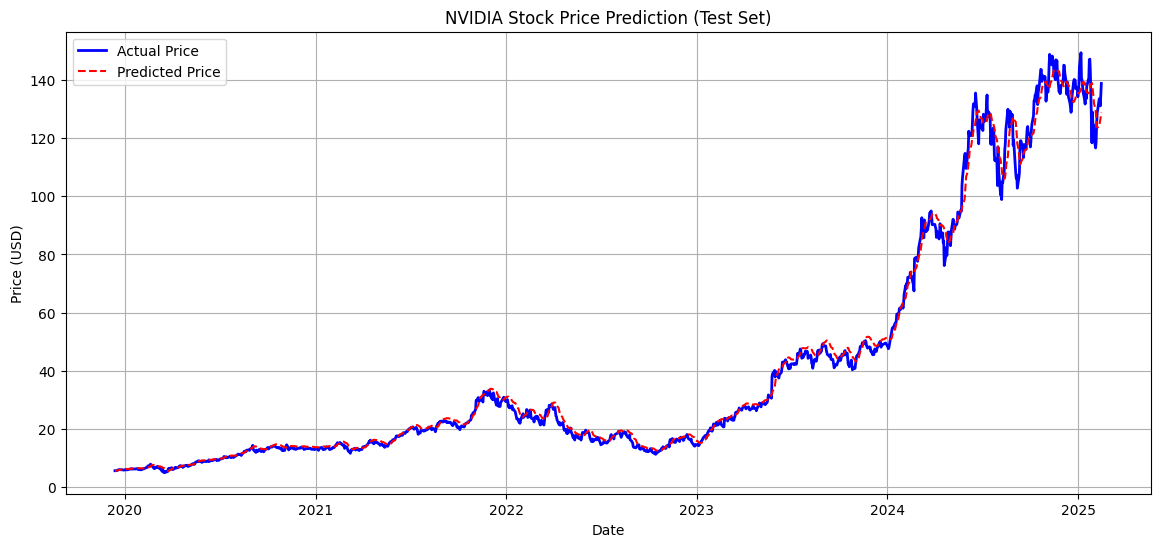

In [27]:
# -----------------------------------
# 11. PLOT ACTUAL VS PREDICTED PRICES
# -----------------------------------

plt.figure(figsize=(14, 6))
plt.plot(test_dates, actual_prices, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, predicted_prices, label='Predicted Price', color='red', linestyle='--')
plt.title("NVIDIA Stock Price Prediction (Test Set)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# -----------------------------------
# 12. PREDICT NEXT DAY'S PRICE
# -----------------------------------

recent_60_days = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
next_day_prediction = model.predict(recent_60_days)
next_day_price = scaler.inverse_transform(next_day_prediction)

print(f"Predicted stock price for the next day: ${next_day_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted stock price for the next day: $130.40
